<a href="https://colab.research.google.com/github/Andre647/Ciencia_de_Dados/blob/main/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets

In [ ]:
t_basic = pd.read_csv('/content/title_basics.tsv', sep = '	',index_col = 0)
t_crew = pd.read_csv('/content/title_crew.tsv', sep = '	',index_col = 0)
t_ratings = pd.read_csv('/content/title_ratings.tsv', sep = '	',index_col = 0)
name_basics = pd.read_csv('/content/name_basics.tsv', sep = '	',index_col = 0)

<ipython-input-172-50203eb07101>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  t_basic = pd.read_csv('/content/title_basics.tsv', sep = '	',index_col = 0)


In [135]:
t_basic.head()
#t_crew.head()
#t_ratings.head()
#name_basics.head()

,titleType,primaryTitle,startYear,genre1,genre2,genre3,averageRating,numVotes
tconst,,,,,,,,
tt0000009,movie,Miss Jerry,1894.0,Romance,None,None,5.3,204.0
tt0000147,movie,The Corbett-Fitzsimmons Fight,1897.0,Documentary,News,Sport,5.3,469.0
tt0000574,movie,The Story of the Kelly Gang,1906.0,Action,Adventure,Biography,6.0,823.0
tt0000591,movie,The Prodigal Son,1907.0,Drama,None,None,4.4,20.0
tt0000615,movie,Robbery Under Arms,1907.0,Drama,None,None,4.3,24.0


#Limpeza dataset t_basic

In [169]:
  # separa o genero em 3 colunas
t_basic[['genre1', 'genre2', 'genre3']] = t_basic['genres'].str.split(',', expand=True)

  # colunas não usadas
t_basic = t_basic.drop(['originalTitle','genres','isAdult','endYear','runtimeMinutes'],axis = 1)

  # apaga valores que não serão usados
cortados = t_basic['titleType'].isin(['short','tvShort','tvMiniSeries','tvSpecial','video','videoGame','nan'])
t_basic = t_basic.drop(t_basic[cortados].index)

  # apaga valores nulos na coluna de genero
limpeza = t_basic['genre1'].isin(['\\N'])
t_basic = t_basic.drop(t_basic[limpeza].index)

 # adiciona as notas aos filmes
t_basic = pd.merge(t_basic, t_ratings, on='tconst', how='left')

 # transforma ano em numerico
t_basic['startYear'] = pd.to_numeric(t_basic['startYear'], errors='coerce')

#Função que retorna os dez filmes mais bem avaliados para um genero
(consideramos no minimo 50 000 avaliações)

In [170]:
def top_filmes_genero(df, genero_especifico):
    
    #concatena as colunas de genero
    df1 = df[(df['genre1'] == genero_especifico) & (t_basic['numVotes'] > 50000.0)]
    df2 = df[(df['genre2'] == genero_especifico) & (t_basic['numVotes'] > 50000.0)]
    df3 = df[(df['genre3'] == genero_especifico) & (t_basic['numVotes'] > 50000.0)]
    df_genero = pd.concat([df1 ,df2 ,df3 ])
    
    #ordena os melhores e separa os 5
    df_ordenado = df_genero.sort_values('averageRating', ascending=False)
    top_10_filmes = df_ordenado.head(10)[['primaryTitle','averageRating']]
    
    return top_10_filmes

def exibicao(df):

  #caixa de texto
  texto_digitado = input('Digite qual genênero você deseja conhecer os melhores filmes: ').capitalize()

  #controle
  valores_coluna1 = t_basic['genre1'].unique()
  valores_coluna2 = t_basic['genre2'].unique()
  valores_coluna3 = t_basic['genre3'].unique()
  genero = set(np.concatenate((valores_coluna1, valores_coluna2, valores_coluna3)))

  if texto_digitado not in genero:
    return 0
  else:
    # grafico
    top_10_filmes = top_filmes_genero(df,texto_digitado)
    sns.barplot(x = 'averageRating',y = 'primaryTitle', palette = 'mako',data = top_10_filmes)
    #plt.xlim(8, 10)
    return 1

##Escolha entre estes generos apresentados:

Action, Adult, Adventure, Animation,

Biography, Comedy, Crime, Documentary,

Drama, Family, Fantasy, Film-Noir, Game-Show,

History, Horror, Music, Musical, Mystery,

News, Reality-TV, Romance, Sci-Fi, Short, Sport,

Talk-Show, Thriller, War, Western,

Digite qual genênero você deseja conhecer os melhores filmes: animation


1

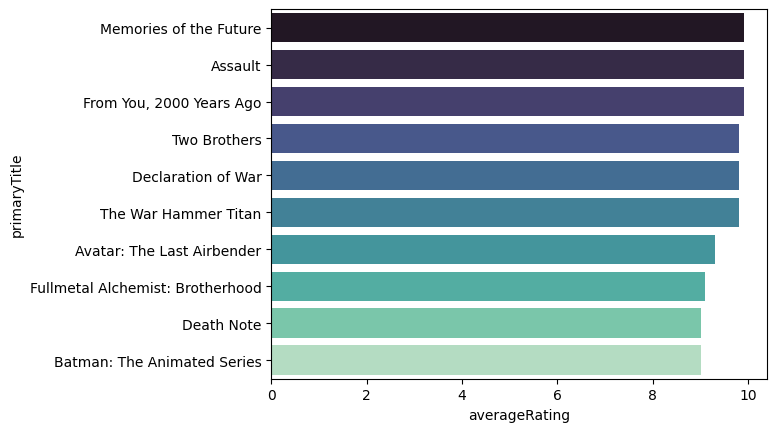

In [171]:
exibicao(t_basic)

#Limpando

##basics
  titleType:
    apenas filmes e series? curtas metragem,jogos?
    apenas seculo 21? todos os anos?
    inserir notas?

  originalTitle:
    apagar?

  isAdult:
    apagar?

  runtimeMinutes:
    apagar?

  genres:
    dividir em 3?
    apagar documentarios? mini series?

##crew
  join com nomes?

##ratings
  join com basics?

##name_basics
  apagar ano nascimento?
  ano de morte?
  oq fazer com titulos referencia?

#Perguntas
##1 Quais são os melhores filmes de cada gênero? qual genero mais cresceu ao longo dos anos?

##2 A guerra na ucrania afetou a quantidade de filmes de guerra?

##3 O sexo do ator interfere na nota ganhada? melhores atores? teste de hipotese